<a href="https://colab.research.google.com/github/Chan0226/CNN/blob/main/ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# cifar10 class 이름
class_name = ['airplane','automobile','bird','cat','deer','dog','flog','hourse','ship','truck']

In [ ]:
# 신경망에 입력할 데이터 형태로 변환
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_train = x_train[0:12]
y_train = y_train[0:12]

170508288/170498071 [==============================] - 14s 0us/step


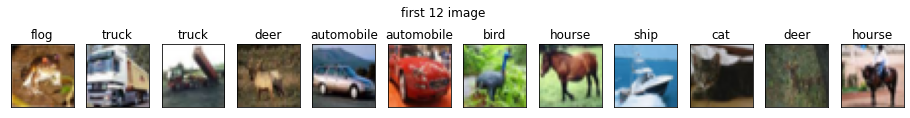

In [ ]:
plt.figure(figsize=(16,2))
plt.suptitle('first 12 image')
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[int(y_train[i])])

In [ ]:
# imagedatagenerator 적용
batch_size = 6
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,
                               horizontal_flip=True)
gen = generator.flow(x_train,y_train,batch_size = batch_size)

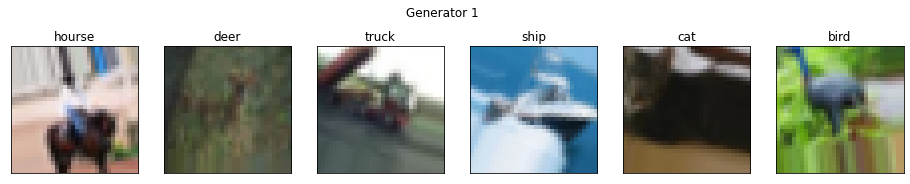

In [ ]:
# 1번째
img,label =  gen.next()
plt.figure(figsize = (16,3))
plt.suptitle("Generator 1")
for i in range(batch_size):
  plt.subplot(1,batch_size,i+1)
  plt.imshow(img[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[int(label[i])])

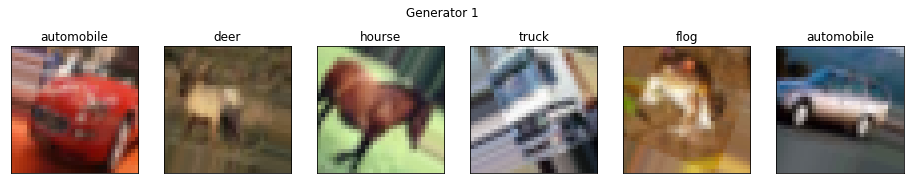

In [ ]:
# 2번째
img,label =  gen.next()
plt.figure(figsize = (16,3))
plt.suptitle("Generator 1")
for i in range(batch_size):
  plt.subplot(1,batch_size,i+1)
  plt.imshow(img[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[int(label[i])])

In [ ]:
# 증대된 영상으로 신경망 학습   : 기존의 데이터 + 증가된 데이터를 적용

In [ ]:
# c-c-p-fc-fc
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,y_train),(x_test,y_test) =  cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# 신경망 모델 설계  C C P D  C C P D FC D FC
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3) ))
cnn.add(Conv2D(32,(3,3),activation='relu' ))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu' ))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10,activation='softmax'))  # 이진 분류 sigmoid

In [ ]:
# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
batch_size = 128
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,
                               horizontal_flip=True)
hist = cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_size),epochs=50,
                         validation_data = (x_test,y_test), verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
391/391 - 62s - loss: 1.7897 - accuracy: 0.3308 - val_loss: 1.3867 - val_accuracy: 0.4979 - 62s/epoch - 158ms/step
Epoch 2/50
391/391 - 32s - loss: 1.5053 - accuracy: 0.4506 - val_loss: 1.4219 - val_accuracy: 0.4979 - 32s/epoch - 82ms/step
Epoch 3/50
391/391 - 32s - loss: 1.3737 - accuracy: 0.5026 - val_loss: 1.1632 - val_accuracy: 0.5909 - 32s/epoch - 82ms/step
Epoch 4/50
391/391 - 33s - loss: 1.2777 - accuracy: 0.5373 - val_loss: 1.2685 - val_accuracy: 0.5551 - 33s/epoch - 84ms/step
Epoch 5/50
391/391 - 32s - loss: 1.2161 - accuracy: 0.5629 - val_loss: 1.0915 - val_accuracy: 0.6197 - 32s/epoch - 81ms/step
Epoch 6/50
391/391 - 33s - loss: 1.1663 - accuracy: 0.5835 - val_loss: 1.0148 - val_accuracy: 0.6441 - 33s/epoch - 83ms/step
Epoch 7/50
391/391 - 33s - loss: 1.1280 - accuracy: 0.5993 - val_loss: 0.9633 - val_accuracy: 0.6620 - 33s/epoch - 83ms/step
Epoch 8/50
391/391 - 32s - loss: 1.0957 - accuracy: 0.6104 - val_loss: 0.9511 - val_accuracy: 0.6675 - 32s/epoch - 83ms/step

In [ ]:
# 신경망의 정확율 accuracy
res  = cnn.evaluate(x_test,y_test,verbose = 0)
print("accuracy",res[1])


accuracy 0.7702999711036682


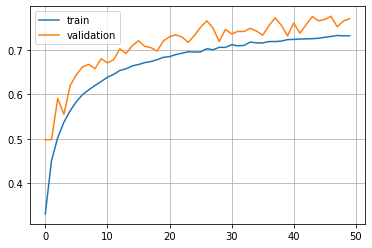

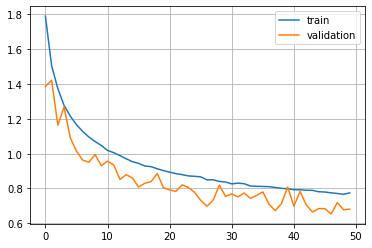

In [ ]:
import matplotlib.pyplot as plt
# 정확율
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

#손실율
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()